<h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
<br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
</br>
<h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

</br>
</br>
 </br>
 </br>
 </br>

 <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
 <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

 </br>
 </br>
 </br>
 </br>
 </br>

 <h5 style="text-align: right;">Студент: Каирова Екатерина Андреевна </h5>
 <h5 style="text-align: right;">5 вариант</h5>
 <h5 style="text-align: right;">Группа: ТФэ-01-21 </h5>

 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>

 <h5 style="text-align: center;">Москва 2024</h5>

 ### $\space$ Дано:
  * $P_0 = 25 \space МПа $ - начальное давление
  * $t_0 = 600 ^\circ C$ -  начальная температура
  * $P_{пп} = 4 \space МПа$ -  давление промперегрева
  * $t_{пп} = 600 ^\circ C$ -  температура промперегрева
  * $P_{к} = 3.5 \space кПа$ -  давление в конденсаторе
  * $t_{п.в.} = 260^\circ C$ -  температура питательной воды

  * $N_{э} = 330 \space МВт$ -  электрическая мощность
  * z = 8 -  число регенеративных подогревателей

# 1. Построение процесса расширения пара в турбине.
## 1.1 Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

# Из графика получаем, что коэффициент равен 0.89

![image.png]( image.png)

In [9]:
from typing import List, Tuple, Optional
from iapws import IAPWS97 as gas
from iapws import IAPWS97
import matplotlib.pyplot as plt
import numpy as np

MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99

def f_delta_p0(p0):
    delta_p0 = 0.05 * p0
    return delta_p0

def f_delta_p_middle(p_middle):
    delta_p_middle = 0.1 * p_middle
    return delta_p_middle

def f_delta_p_1(p_middle):
    delta_p_1 = 0.03 * p_middle
    return delta_p_1

def f_real_p0(p0):
    delta_p0 = f_delta_p0(p0)
    real_p0 = p0 - delta_p0
    return real_p0

def f_real_p1t(p_middle):
    delta_p_middle = f_delta_p_middle(p_middle)
    real_p1t = p_middle + delta_p_middle
    return real_p1t

def f_real_p_middle(p_middle):
    delta_p_1 = f_delta_p_1(p_middle)
    real_p_middle = p_middle - delta_p_1
    return real_p_middle

def f__point_0(p0, t0):
    _point_0 = gas(P = p0 * unit, T=to_kelvin(t0))
    return _point_0

def f_point_0(p0, t0):
    delta_p0 = f_delta_p0(p0)
    _point_0 = f__point_0(p0, t0)
    real_p0=f_real_p0(p0)
    point_0 = gas(P=real_p0 * unit, h=_point_0.h)
    return _point_0

def f_point_1t(p_middle,p0, t0):
    real_p1t = f_real_p1t(p_middle)
    _point_0 = f__point_0(p0, t0)
    point_1t = gas(P=real_p1t * unit, s=_point_0.s)
    return point_1t

def f_hp_heat_drop(p0, t0,p_middle):
    _point_0 = f__point_0(p0, t0)
    point_1t = f_point_1t(p_middle,p0, t0)    
    hp_heat_drop = (_point_0.h - point_1t.h) * internal_efficiency
    return hp_heat_drop

def f_h_1(p0, t0,p_middle):
    point_0 = f_point_0(p0, t0)
    hp_heat_drop = f_hp_heat_drop(p0, t0,p_middle)
    h_1 = point_0.h - hp_heat_drop
    return h_1

def f_point_1(p0, t0,p_middle):
    real_p1t = f_real_p1t(p_middle)
    h_1 = f_h_1(p0, t0,p_middle)
    point_1 = gas(P=real_p1t * unit, h=h_1)
    return point_1

def f__point_middle(p_middle, t_middle):
    _point_middle = gas(P=p_middle * unit, T=to_kelvin(t_middle))
    return _point_middle

def f_point_middle(p_middle, t_middle):
    real_p_middle=f_real_p_middle(p_middle)
    _point_middle=f__point_middle(p_middle, t_middle)
    point_middle = gas(P=real_p_middle * unit, h=_point_middle.h)
    return point_middle

def f_point_2t(pk,p_middle, t_middle):
    _point_middle=f__point_middle(p_middle, t_middle)
    point_2t = gas(P=pk * unit, s=_point_middle.s)
    return point_2t

def f_lp_heat_drop(pk,p_middle, t_middle):
    _point_middle=f__point_middle(p_middle, t_middle)
    point_2t=f_point_2t(pk,p_middle, t_middle)
    lp_heat_drop = (_point_middle.h - point_2t.h) * internal_efficiency
    return lp_heat_drop

def f_h_2(pk,p_middle, t_middle):
    point_middle=f_point_middle(p_middle, t_middle)
    lp_heat_drop=f_lp_heat_drop (pk,p_middle, t_middle)
    h_2 = point_middle.h - lp_heat_drop
    return h_2

def f_point_2(pk,p_middle, t_middle):
    h_2=f_h_2(pk,p_middle, t_middle)
    point_2 = gas(P=pk * unit, h=h_2)
    return point_2

def f_efficiency_hp(p0, t0,p_middle):
    _point_0 = f__point_0(p0, t0)
    point_1 = f_point_1(p0, t0, p_middle)
    point_1t = f_point_1t(p_middle,p0, t0)
    efficiency_hp = (_point_0.h - point_1.h) / (_point_0.h - point_1t.h)
    return efficiency_hp

def f_efficiency_lp(pk,p_middle, t_middle):
    _point_middle=f__point_middle(p_middle, t_middle)
    point_2 = f_point_2(pk,p_middle, t_middle)
    point_2t = f_point_2t(pk,p_middle, t_middle)
    efficiency_lp = (_point_middle.h - point_2.h) / (_point_middle.h - point_2t.h)
    return efficiency_lp

def f_point_k_water(pk):
    point_k_water = gas(P=pk * unit, x=0)
    return point_k_water

def f_point_feed_water(p_feed_water, t_feed_water):
    point_feed_water = gas(P=p_feed_water * unit, T=to_kelvin(t_feed_water))
    return point_feed_water

def f_numenator_without(pk,p_middle, t_middle):
    point_2 = f_point_2(pk,p_middle, t_middle)
    _point_middle=f__point_middle(p_middle, t_middle)
    point_k_water=f_point_k_water(pk)
    numenator_without = point_2.T * (_point_middle.s - point_k_water.s)
    return numenator_without

def f_denumenator_without(p_middle, t_middle,p0, t0, pk):
    point_0 = f_point_0(p0, t0)
    point_1t = f_point_1t(p_middle,p0, t0)
    point_middle=f_point_middle(p_middle, t_middle)
    point_k_water=f_point_k_water(pk)
    denumenator_without = (point_0.h - point_1t.h) + (point_middle.h - point_k_water.h)
    return denumenator_without

def f_without_part(p_middle, t_middle,p0, t0, pk):
    numenator_without=f_numenator_without(pk,p_middle, t_middle)
    denumenator_without=f_denumenator_without(p_middle, t_middle,p0, t0, pk)
    without_part = 1 - (numenator_without / denumenator_without)
    return without_part

def f_numenator_infinity(pk,p_middle, t_middle, p_feed_water, t_feed_water):
    point_2 = f_point_2(pk,p_middle, t_middle)
    _point_middle=f__point_middle(p_middle, t_middle)
    point_feed_water=f_point_feed_water(p_feed_water, t_feed_water)
    numenator_infinity = point_2.T * (_point_middle.s - point_feed_water.s)
    return numenator_infinity

def f_denumenator_infinity(p0, t0,p_middle, t_middle,p_feed_water, t_feed_water):
    point_0 = f_point_0(p0, t0)
    point_1t = f_point_1t(p_middle,p0, t0)
    point_middle=f_point_middle(p_middle, t_middle)
    point_feed_water=f_point_feed_water(p_feed_water, t_feed_water)
    denumenator_infinity = (point_0.h - point_1t.h) + (point_middle.h - point_feed_water.h)
    return denumenator_infinity

def f_infinity_part(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water):
    numenator_infinity=f_numenator_infinity(pk,p_middle, t_middle, p_feed_water, t_feed_water)
    denumenator_infinity=f_denumenator_infinity(p0, t0,p_middle, t_middle,p_feed_water, t_feed_water)
    infinity_part = 1 - (numenator_infinity / denumenator_infinity)
    return infinity_part

def f_ksi_infinity(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water):
    without_part=f_without_part(p_middle, t_middle,p0, t0, pk)
    infinity_part=f_infinity_part(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)
    ksi_infinity = 1 - (without_part / infinity_part)
    return ksi_infinity

def f_coeff(pk,p_middle, t_middle,p_feed_water, t_feed_water):
    point_feed_water=f_point_feed_water(p_feed_water, t_feed_water)
    point_2 = f_point_2(pk,p_middle, t_middle)
    coeff = (point_feed_water.T - point_2.T) / (to_kelvin(374.2) - point_2.T)
    return coeff

def f_ksi(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water):
    ksi_infinity=f_ksi_infinity(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)
    ksi = 0.89 * ksi_infinity
    return ksi
def f_eff_num(p0, t0,pk,p_middle, t_middle):
    hp_heat_drop=f_hp_heat_drop(p0, t0,p_middle)
    lp_heat_drop=f_lp_heat_drop(pk,p_middle, t_middle)
    eff_num = hp_heat_drop + lp_heat_drop
    return eff_num
def f_eff_denum(p0, t0,p_middle, t_middle,pk):
    hp_heat_drop=f_hp_heat_drop(p0, t0,p_middle)
    point_middle=f_point_middle(p_middle, t_middle)
    point_k_water=f_point_k_water(pk)
    eff_denum = hp_heat_drop + (point_middle.h - point_k_water.h)
    return eff_denum

def f_efficiency(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water):
    eff_num=f_eff_num(p0, t0,pk,p_middle, t_middle)
    eff_denum=f_eff_denum(p0, t0,p_middle, t_middle,pk)
    ksi=f_ksi(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)
    efficiency = (eff_num / eff_denum) * (1 / (1 - ksi))
    return efficiency

def f_estimated_heat_drop(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water):
    point_0 = f_point_0(p0, t0)
    point_feed_water=f_point_feed_water(p_feed_water, t_feed_water)
    point_middle=f_point_middle(p_middle, t_middle)
    efficiency=f_efficiency(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)
    point_1 = f_point_1(p0, t0, p_middle)
    estimated_heat_drop = efficiency * ((point_0.h - point_feed_water.h) + (point_middle.h - point_1.h))
    return estimated_heat_drop

def f_inlet_mass_flow(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water):
    estimated_heat_drop=f_estimated_heat_drop(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)
    inlet_mass_flow = electrical_power / (estimated_heat_drop * 1000 * mechanical_efficiency * generator_efficiency)
    return inlet_mass_flow

def f_condenser_mass_flow(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water):
    point_2 = f_point_2(pk,p_middle, t_middle)
    point_k_water=f_point_k_water(pk)
    efficiency=f_efficiency(pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)
    condenser_mass_flow = (electrical_power /((point_2.h - point_k_water.h) * 1000 * mechanical_efficiency * generator_efficiency)* ((1 / efficiency) - 1))
    return condenser_mass_flow


In [16]:

def legend_without_duplicate_labels(ax: plt.Axes) -> None:
    
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

   
def plot_process(ax: plt.Axes, points: List[IAPWS97], **kwargs) -> None:

    ax.plot([point.s for point in points], [point.h for point in points], **kwargs)

   
def get_isobar(point: IAPWS97) -> Tuple[List[float], List[float]]:
   
    s = point.s
    s_values = np.arange(s * 0.9, s * 1.1, 0.2 * s / 1000)
    h_values = [gas(P=point.P, s=_s).h for _s in s_values]
    return s_values, h_values


def _get_isoterm_steam(point: IAPWS97) -> Tuple[List[float], List[float]]:
   
    t = point.T
    p = point.P
    s = point.s
    s_max = s * 1.2
    s_min = s * 0.8
    p_values = np.arange(p * 0.8, p * 1.2, 0.4 * p / 1000)
    h_values = np.array([gas(P=_p, T=t).h for _p in p_values])
    s_values = np.array([gas(P=_p, T=t).s for _p in p_values])
    mask = (s_values >= s_min) & (s_values <= s_max)
    return s_values[mask], h_values[mask]


def _get_isoterm_two_phases(point: IAPWS97) -> Tuple[List[float], List[float]]:
    
    x = point.x
    p = point.P
    x_values = np.arange(x * 0.9, min(x * 1.1, 1), (1 - x) / 1000)
    h_values = np.array([gas(P=p, x=_x).h for _x in x_values])
    s_values = np.array([gas(P=p, x=_x).s for _x in x_values])
    return s_values, h_values


def get_isoterm(point) -> Tuple[List[float], List[float]]:

    if point.phase == 'Two phases':
        return _get_isoterm_two_phases(point)
    return _get_isoterm_steam(point)


def plot_isolines(ax: plt.Axes, point: IAPWS97) -> None:
    
    s_isobar, h_isobar = get_isobar(point)
    s_isoterm, h_isoterm = get_isoterm(point)
    ax.plot(s_isobar, h_isobar, color='green', label='Изобара')
    ax.plot(s_isoterm, h_isoterm, color='blue', label='Изотерма')

  
def plot_points(ax: plt.Axes, points: List[IAPWS97]) -> None:
    
    for point in points:
        ax.scatter(point.s, point.h, s=50, color="red")
        plot_isolines(ax, point)


def get_humidity_constant_line(
    point: IAPWS97,
    max_p: float,
    min_p: float,
    x: Optional[float]=None
) -> Tuple[List[float], List[float]]:
   
    _x = x if x else point.x
    p_values = np.arange(min_p, max_p, (max_p - min_p) / 1000)
    h_values = np.array([gas(P=_p, x=_x).h for _p in p_values])
    s_values = np.array([gas(P=_p, x=_x).s for _p in p_values])
    return s_values, h_values


def plot_humidity_lines(ax: plt.Axes, points: List[IAPWS97]) -> None:

    pressures = [point.P for point in points]
    min_pressure = min(pressures) if min(pressures) > 700/1e6 else 700/1e6
    max_pressure = max(pressures) if max(pressures) < 22 else 22
    for point in points:
        if point.phase == 'Two phases':
            s_values, h_values = get_humidity_constant_line(point, max_pressure, min_pressure, x=1)
            ax.plot(s_values, h_values, color="gray")
            s_values, h_values = get_humidity_constant_line(point, max_pressure, min_pressure)
            ax.plot(s_values, h_values, color="gray", label='Линия сухости')
            ax.text(s_values[10], h_values[10], f'x={round(point.x, 2)}')

          
def plot_hs_diagram(ax: plt.Axes, points: List[IAPWS97]) -> None:

    plot_points(ax, points)
    plot_humidity_lines(ax, points)
    ax.set_xlabel(r"S, $\frac{кДж}{кг * K}$", fontsize=14)
    ax.set_ylabel(r"h, $\frac{кДж}{кг}$", fontsize=14)
    ax.set_title("HS-диаграмма процесса расширения", fontsize=18)
    ax.legend()
    ax.grid()
    legend_without_duplicate_labels(ax)




In [17]:
electrical_power = 810 * (10 ** 6)
p0 = 24.2 * MPa
t0 = 550
p_middle = 3.5 * MPa
t_middle = 555
pk = 3.7 * kPa
t_feed_water = 273
p_feed_water = 1.4 * p0
z = 8

### Массовый расход в турбину на входе (кг/с)

In [12]:
f_inlet_mass_flow(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)

641.0896976342298

### Массовый расход в конденсатор (кг/с)

In [13]:
f_condenser_mass_flow(electrical_power,pk,p0, t0,p_middle, t_middle, p_feed_water, t_feed_water)

422.7317358156562

### Процесс расширения пара в турбине

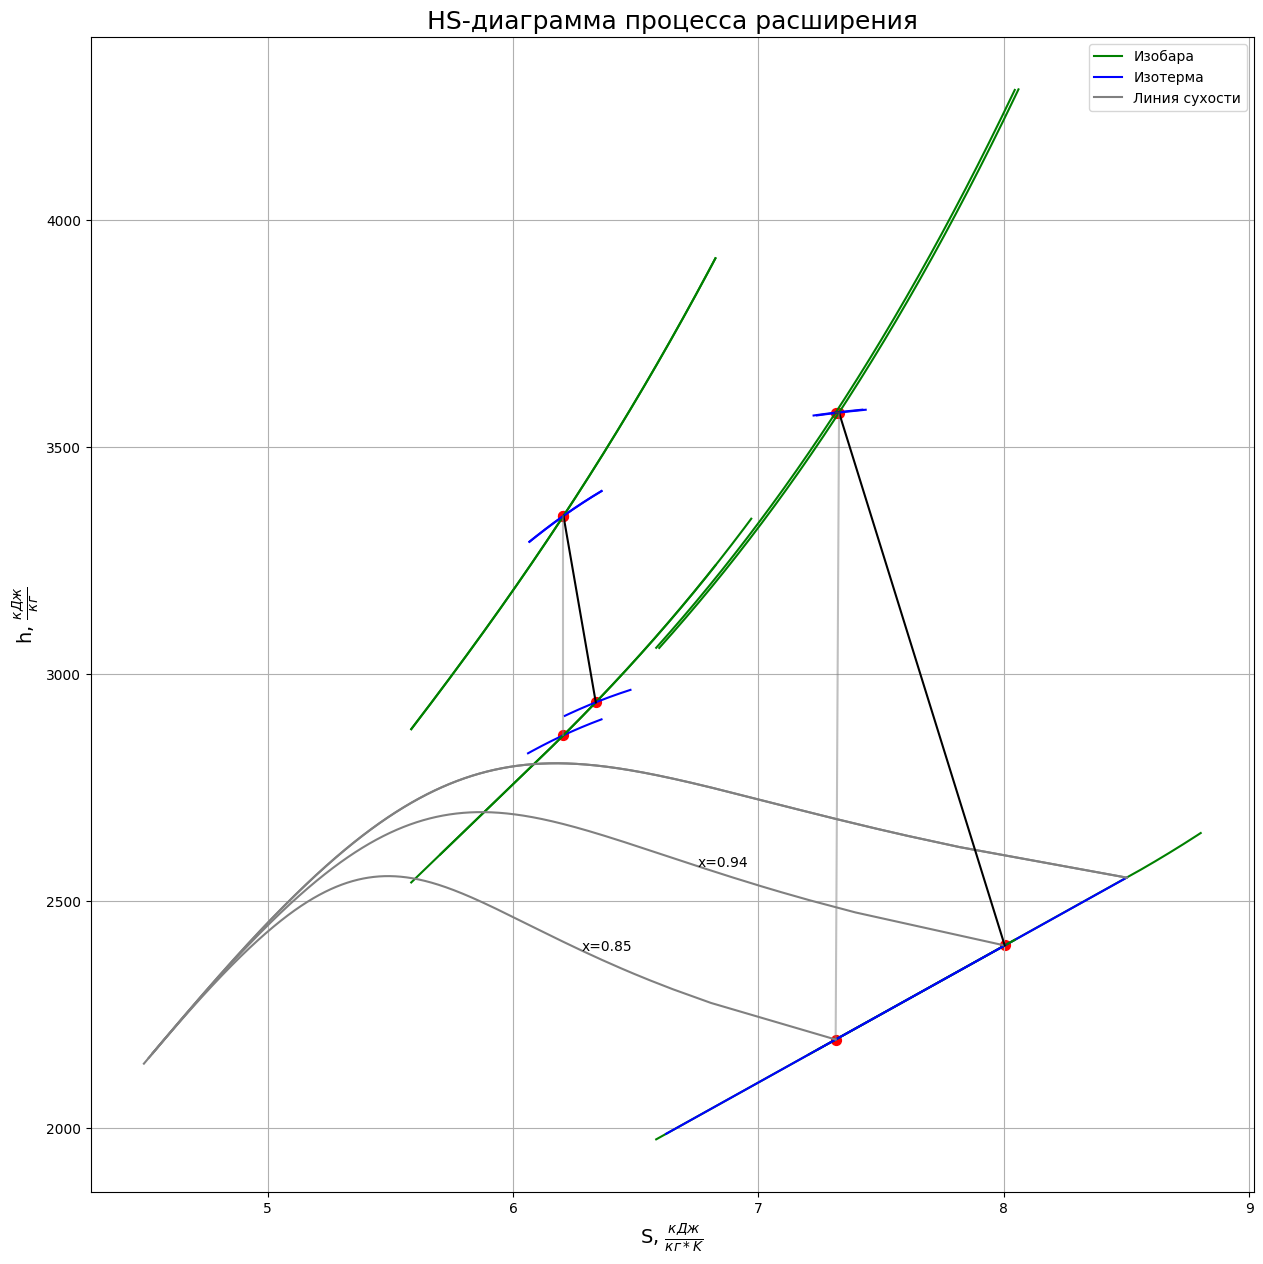

In [14]:
fig, ax  = plt.subplots(1, 1, figsize=(15, 15))
plot_hs_diagram(
    ax,
    points=[f__point_0(p0, t0),f_point_0(p0, t0), f_point_1t(p_middle,p0, t0), f_point_1(p0, t0, p_middle),
            f__point_middle(p_middle, t_middle), f_point_middle(p_middle, t_middle), f_point_2(pk,p_middle, t_middle), 
            f_point_2t(pk,p_middle, t_middle)]
)
plot_process(ax, points=[f__point_0(p0, t0), f_point_0(p0, t0), f_point_1(p0, t0, p_middle)], color='black')
plot_process(ax, points=[f__point_middle(p_middle, t_middle), f_point_middle(p_middle, t_middle), f_point_2(pk,p_middle, t_middle)], color='black')
plot_process(ax, points=[f__point_0(p0, t0), f_point_0(p0, t0), f_point_1t(p_middle,p0, t0)], alpha=0.5, color='grey')
plot_process(ax, points=[f__point_middle(p_middle, t_middle), f_point_middle(p_middle, t_middle), f_point_2t(pk,p_middle, t_middle)], alpha=0.5, color='grey')